<a href="https://colab.research.google.com/github/bmounikareddy98/Machine-learning-project/blob/main/Copy_of_lstm_(1)_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 6.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics
import math
import yfinance as yf



In [3]:
def error_function(real_Value,predicted_Value):
    #mse
    sse=((real_Value- predicted_Value)**2)
    mean_squared_error= np.mean(sse)
    #rmse
    root_mean_squared_error=np.sqrt(mean_squared_error)
    return mean_squared_error,root_mean_squared_error



In [4]:
# plotting of graphs
def plot_graphs(real_value, training_data, test_data):
    plt.plot(real_value, label="The actual value", color="red")
    plt.plot(training_data, label="Prediction on training data", color='blue')
    test_data = [j for j in test_data]
    # connect train and test lines
    test_data.insert(0, training_data[-1])
    # x values for test prediction plot
    plt.plot([x for x in range(len(training_data) - 1, len(training_data) + len(test_data) - 1)], test_data, label="Prediction on testing data", color='green')
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.title("Stock price Prediction")
    plt.legend()
    plt.grid()
    plt.show()

[*********************100%***********************]  1 of 1 completed
Training cycle: 0
Training cycle: 1
Training cycle: 2
Training cycle: 3
Training cycle: 4
Training cycle: 5
Training cycle: 6
Training cycle: 7
Training cycle: 8
Training cycle: 9
Training cycle: 10
Training cycle: 11
Training cycle: 12
Training cycle: 13
Training cycle: 14
Training cycle: 15
Training cycle: 16
Training cycle: 17
Training cycle: 18
Training cycle: 19
Training cycle: 20
Training cycle: 21
Training cycle: 22
Training cycle: 23
Training cycle: 24
Training cycle: 25
Training cycle: 26
Training cycle: 27
Training cycle: 28
Training cycle: 29
Training cycle: 30
Training cycle: 31
Training cycle: 32
Training cycle: 33
Training cycle: 34
Training cycle: 35
Training cycle: 36
Training cycle: 37
Training cycle: 38
Training cycle: 39
Training cycle: 40
Training cycle: 41
Training cycle: 42
Training cycle: 43
Training cycle: 44
Training cycle: 45
Training cycle: 46
Training cycle: 47
Training cycle: 48
Training c

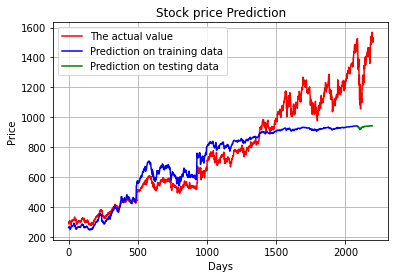

In [50]:
def main():
    # read into dataframe
    #url="https://raw.githubusercontent.com/bmounikareddy98/Machine-learning-project/main/GOOG%20(3).csv"
    #data = pd.read_csv(url)
    #extract only the adjusted close prices of the selected stock
    data = yf.download('GOOG','2011-11-01','2021-11-01')

    data = data['Adj Close']
    normalization_value=1000
    #1st two days
    training_1 = [[data[i-6], data[i-5]] for i in range(len(data[0:2100])) if i >= 6]
    #3rd and 4th day
    training_2 = [[data[i-4], data[i-3]] for i in range(len(data[0:2100])) if i >= 6]
    #5th and 6th day
    training_3 = [[data[i-2], data[i-1]] for i in range(len(data[0:2100])) if i >= 6]
    #7th day or targeted train_pred
    training_y = [[i] for i in data[6:2100]]

    #convert into arrays
    training_1 = np.array(training_1, dtype=float)
    training_2 = np.array(training_2, dtype=float)
    training_3 = np.array(training_3, dtype=float)
    training_y = np.array(training_y, dtype=float)

    # Normalize
    training_1= training_1/normalization_value
    training_2 = training_2/normalization_value
    training_3 = training_3/normalization_value
    training_y = training_y/normalization_value



    # create neural networks
    LSTM = LongShortTermMemory()



    # number of training cycles
    train_cycles = 200
      # training the LSTM network
    for c in range(train_cycles):
        print("Training cycle: "+str(c))
    for n in training_1:
        training_prediction = LSTM.training(training_1, training_2, training_3, training_y)



    # Accuracies

    error_mse_train, error_rmse_train=error_function(training_y,training_prediction)
    print("Mean squared error of train data: "+ str(error_mse_train))
    print("Root mean squared error of train data: "+ str(error_rmse_train))
    # de-Normalize
    training_prediction = np.array(training_prediction, dtype=float)
    training_prediction *=normalization_value
    training_y *=normalization_value

    # transpose
    training_prediction = training_prediction.T






    testing_1 = [[data[j - 6], data[j - 5]] for j in range(2100, 2200)]
    testing_2 = [[data[j - 4], data[j - 3]] for j in range(2100, 2200)]
    testing_3 = [[data[j - 2], data[j - 1]] for j in range(2100, 2200)]
    testing_y = [[j] for j in data[2100:2200]]



    testing_1 = np.array(testing_1, dtype=float)
    testing_2 = np.array(testing_2, dtype=float)
    testing_3 = np.array(testing_3, dtype=float)
    testing_y = np.array(testing_y, dtype=float)




    # Normalization

    testing_1 = testing_1/normalization_value
    testing_2 = testing_2/normalization_value
    testing_3 = testing_3/normalization_value
    testing_y = testing_y/normalization_value



    # test_pred the network with unseen data
    testing_prediction = LSTM.testing(testing_1, testing_2, testing_3)
    testing_prediction = np.array(testing_prediction, dtype=float)



    # print various accuracies
    error_mse_test, error_rmse_test=error_function(testing_y, testing_prediction)
    print("Mean squared error of test data: "+ str(error_mse_test))
    print("Root mean squared error of test data: "+ str(error_rmse_test))



    # de-Normalize data
    testing_prediction = testing_prediction * normalization_value



    testing_y = testing_y * normalization_value



    # transplose test_pred results
    testing_prediction = testing_prediction.T





    # plotting training and test_pred results on same graph

    #print(df.head())
    data = data.to_frame()
    #print(df['Adj Close'].values)

    plot_graphs(data['Adj Close'].values[0:2200], training_prediction, testing_prediction)




if __name__ == '__main__':
    main()